<a href="https://colab.research.google.com/github/lizeth-diaz04/PROYECTO-EXAMEN-DE-LA-UNIDAD-4/blob/main/Proyecto_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PORTADA
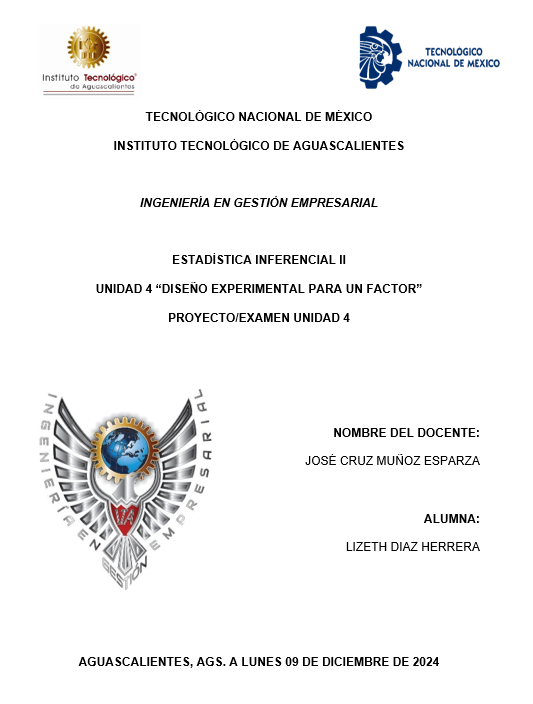

# INTRODUCCIÓN

El rendimiento académico de los estudiantes es un tema de interés en la educación debido a su impacto en el desarrollo personal y profesional. Este proyecto tiene como objetivo analizar factores clave que influyen en el éxito académico, utilizando un conjunto de datos que incluye variables relacionadas con hábitos de estudio, participación familiar, recursos disponibles, y características personales y contextuales. Mediante el análisis de estos datos, se busca identificar patrones y relaciones que puedan informar estrategias para mejorar el rendimiento estudiantil.

#MARCO TEÓRICO
El rendimiento académico está influido por múltiples factores que interactúan de manera compleja. De acuerdo con estudios previos, los hábitos de estudio, como el número de horas dedicadas a esta actividad, tienen una correlación positiva con el desempeño en exámenes (Duckworth & Seligman, 2005). La asistencia regular a clases es otro factor crítico, ya que fomenta la continuidad en el aprendizaje y la participación activa (Finn, 1989).

La participación de los padres en la educación de sus hijos ha sido identificada como un predictor importante del éxito académico, al igual que la disponibilidad de recursos educativos en el hogar (Hill & Tyson, 2009). Factores como la calidad del profesorado y el tipo de escuela (pública o privada) también desempeñan un papel significativo en la calidad de la enseñanza recibida (Hanushek, 1997).

En términos personales, características como el nivel de motivación, la cantidad de sueño, y la participación en actividades extracurriculares contribuyen al bienestar general del estudiante, afectando indirectamente su rendimiento (Fredricks, Blumenfeld & Paris, 2004). Por último, condiciones contextuales como el ingreso familiar, el nivel educativo de los padres y la distancia a la escuela también influyen en las oportunidades de aprendizaje (Coleman et al., 1966).

Este marco teórico guía el análisis de los datos, proporcionando un contexto para interpretar las relaciones entre las variables y el puntaje final del examen.

#METODOLOGÍA
Para llevar a cabo este análisis, se siguieron los pasos siguientes:

* Exploración y Preprocesamiento de Datos

Se importó el conjunto de datos y se exploraron sus características mediante estadísticas descriptivas.
Se manejaron valores faltantes, y las variables categóricas fueron codificadas en un formato numérico cuando fue necesario.
* Análisis Estadístico

Se calcularon correlaciones entre variables continuas como horas de estudio, asistencia y puntaje en el examen.
Para variables categóricas como el tipo de escuela o la calidad del profesorado, se realizaron pruebas ANOVA para determinar diferencias significativas en los puntajes.
* Modelado Predictivo

Se implementaron modelos de regresión lineal para evaluar la relación entre las variables explicativas y el puntaje del examen.
Se evaluaron los resultados mediante métricas como R^2 y error cuadrático medio (MSE).
* Visualización de Resultados

Se utilizaron gráficos como histogramas, diagramas de dispersión y boxplots para ilustrar los hallazgos clave.
* Interpretación de Resultados

Los resultados se analizaron a la luz del marco teórico, destacando los factores con mayor impacto en el puntaje de examen.
Este enfoque garantiza un análisis integral de los datos, proporcionando información útil para la mejora del rendimiento académico.

In [1]:
#Suprimir los warings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Manipular datos
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lizeth-diaz04/PROYECTO-EXAMEN-UNIDAD-4/refs/heads/main/dataset%20(2).csv')
df.drop(columns=[], inplace=True)
df.dropna(inplace=True)
df

,horas_estudio,asistencia,participacion_parental,acceso_a_recursos,actividades_extracurriculares,horas_suenio,calificaciones_previas,nivel_motivacion,acceso_internet,sesiones_tutoria,ingreso_familiar,calidad_profesorado,tipo_escuela,influencia_companieros,actividad_fisica,discapacidad_aprendizaje,nivel_estudio_padres,distancia,genero,puntaje_examen
0,23,84,bajo,elevado,no,7,73,bajo,si,0,bajo,medio,publico,positivo,3,no,preparatoria,cercano,hombre,67
1,19,64,bajo,medio,no,8,59,bajo,si,2,medio,bajo,publico,negativo,4,no,universidad,moderado,mujer,61
2,24,98,medio,bajo,si,7,91,medio,si,2,medio,bajo,publico,neutral,4,no,posgrado,cercano,hombre,74
3,29,89,bajo,medio,si,8,98,medio,si,1,medio,bajo,publico,negativo,4,no,preparatoria,moderado,hombre,71
4,19,92,medio,bajo,si,6,65,medio,si,3,medio,elevado,publico,neutral,4,no,universidad,cercano,mujer,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,elevado,medio,no,7,76,medio,si,1,elevado,medio,publico,positivo,2,no,preparatoria,cercano,mujer,68
6603,23,76,elevado,medio,no,8,81,medio,si,3,bajo,elevado,publico,positivo,2,no,preparatoria,cercano,mujer,69
6604,20,90,medio,bajo,si,6,65,bajo,si,3,bajo,medio,publico,negativo,2,no,posgrado,cercano,mujer,68
6605,10,86,elevado,elevado,si,6,91,elevado,si,2,bajo,medio,privado,positivo,3,no,preparatoria,lejano,mujer,68


#PARTICIPACIÓN PARENTAL

In [3]:
df['participacion_parental'].unique()

array(['bajo', 'medio', 'elevado'], dtype=object)

In [4]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['participacion_parental'] == 'bajo']['puntaje_examen'],
    df[df['participacion_parental'] == 'medio']['puntaje_examen'],
    df[df['participacion_parental'] == 'elevado']['puntaje_examen'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 80.46
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
   bajo elevado   1.7334   0.0  1.4042  2.0626   True
   bajo   medio   0.7344   0.0  0.4363  1.0326   True
elevado   medio   -0.999   0.0 -1.2636 -0.7344   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

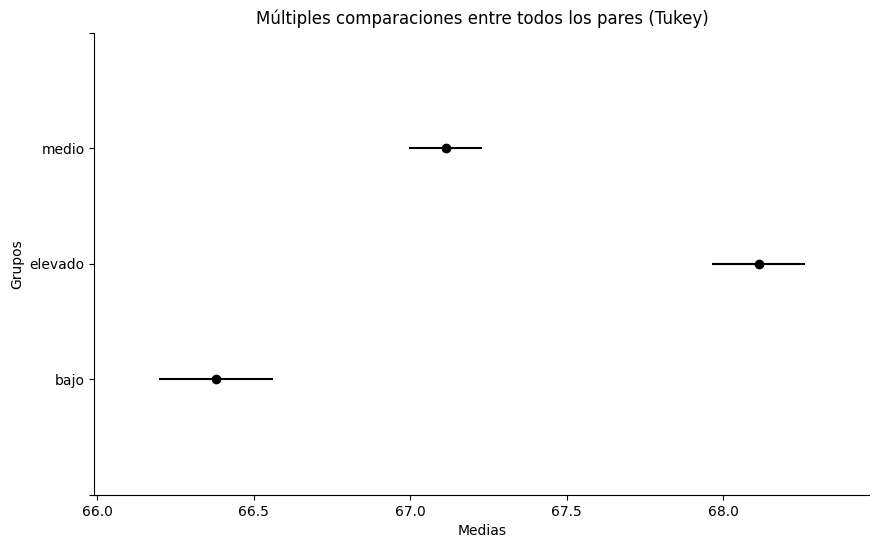

In [5]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['participacion_parental'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* El ANOVA indica si diferentes niveles de participación parental afectan los puntajes de los exámenes.
* Posible interpretación: Si es significativo, la participación activa de los padres tiene un impacto positivo en el desempeño. Tukey revelaría si "participación elevada" supera significativamente a "baja".
* Grupo con mayor impacto: "Elevada participación parental".
Los padres que están más involucrados (asisten a reuniones escolares, supervisan tareas) suelen tener hijos con mejor desempeño académico.

#ACCESO A RECURSOS


In [6]:
df['acceso_a_recursos'].unique()

array(['elevado', 'medio', 'bajo'], dtype=object)

In [7]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['acceso_a_recursos'] == 'bajo']['puntaje_examen'],
    df[df['acceso_a_recursos'] == 'medio']['puntaje_examen'],
    df[df['acceso_a_recursos'] == 'elevado']['puntaje_examen'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 77.74
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
   bajo elevado   1.4212   0.0  1.1539  1.6885   True
   bajo   medio   0.6001   0.0  0.3157  0.8845   True
elevado   medio  -0.8211   0.0 -1.1309 -0.5113   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

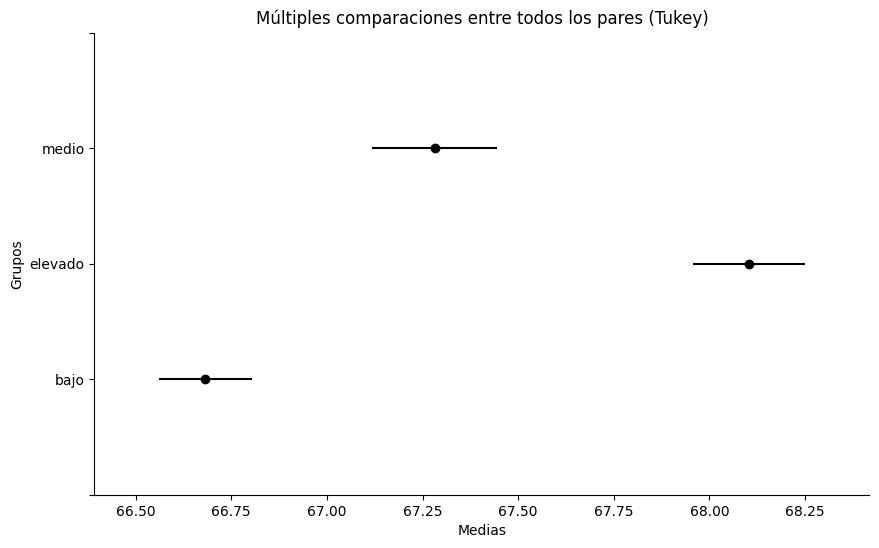

In [8]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['acceso_a_recursos'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* El análisis ANOVA evalúa cómo la disponibilidad de recursos educativos influye en los resultados.
* Posible conclusión: Si significativo, más acceso a recursos se relaciona con mejores resultados; Tukey identificaría qué nivel de acceso (bajo, medio, alto) tiene mayores beneficios.
* Grupo con mayor impacto: "Alto acceso a recursos".
Los estudiantes que tienen acceso a libros, tecnología y otros materiales educativos presentan mejores puntajes debido a la mayor facilidad para aprender.


#ACTIVIDADES EXTRACURRICULARES

In [9]:
df['actividades_extracurriculares'].unique()

array(['no', 'si'], dtype=object)

In [10]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['actividades_extracurriculares'] == 'si']['puntaje_examen'],
    df[df['actividades_extracurriculares'] == 'no']['puntaje_examen'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 25.46
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    no     si   0.5032   0.0 0.3077 0.6987   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

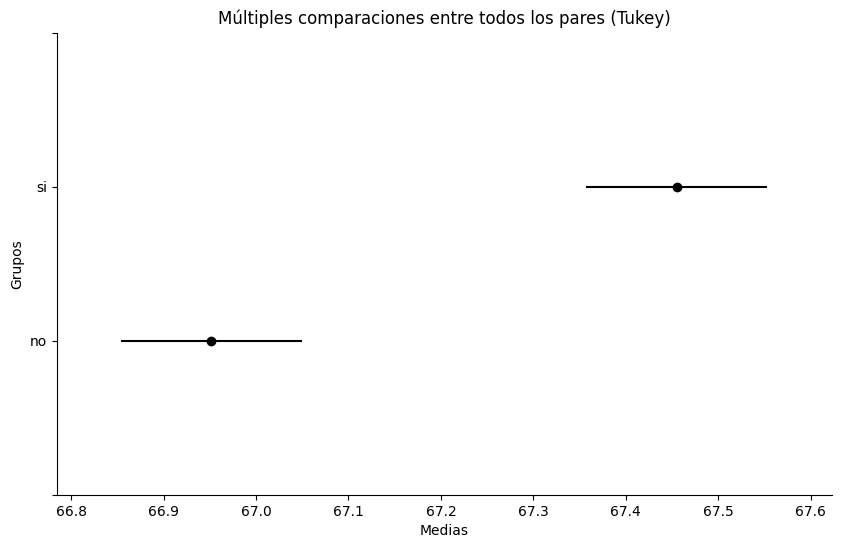

In [11]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['actividades_extracurriculares'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* Se examina si participar en actividades como deportes o clubes impacta en el rendimiento.
* Interpretación: Un resultado significativo podría mostrar que involucrarse en estas actividades mejora habilidades cognitivas o sociales clave para el éxito académico.
* Grupo con mayor impacto: "Participación activa" (Si).
Los estudiantes que participan en deportes, artes o clubes tienden a desarrollar habilidades adicionales, como disciplina y trabajo en equipo, que benefician su aprendizaje.

#NIVEL DE MOTIVACIÓN

In [12]:
df['nivel_motivacion'].unique()

array(['bajo', 'medio', 'elevado'], dtype=object)

In [13]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['nivel_motivacion'] == 'bajo']['puntaje_examen'],
    df[df['nivel_motivacion'] == 'medio']['puntaje_examen'],
    df[df['nivel_motivacion'] == 'elevado']['puntaje_examen'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 25.54
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
   bajo elevado   0.9794    0.0  0.6474 1.3115   True
   bajo   medio   0.5744    0.0  0.3086 0.8402   True
elevado   medio   -0.405 0.0048 -0.7071 -0.103   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

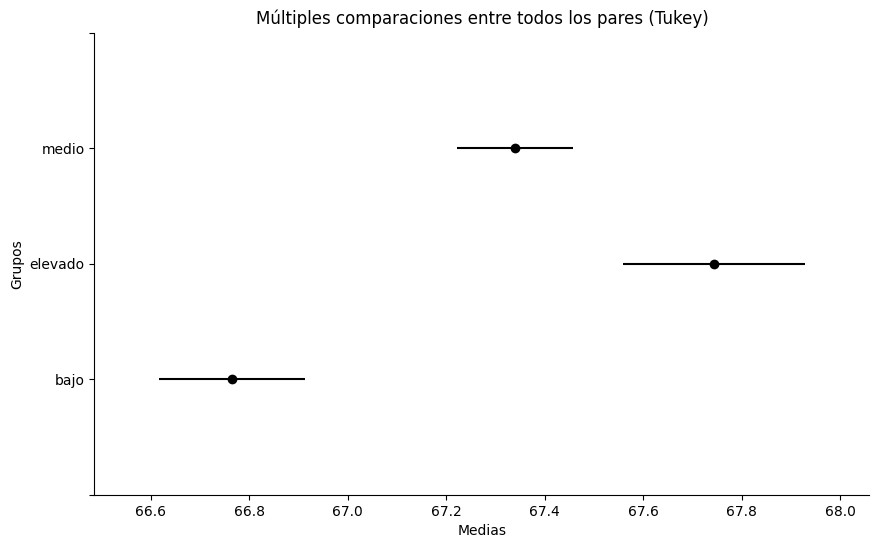

In [14]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['nivel_motivacion'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* ANOVA examina el impacto del nivel de motivación en los puntajes.
* Conclusión: Si significativo, un nivel más alto de motivación mejora el rendimiento; Tukey ayudaría a distinguir entre niveles "alto", "medio" y "bajo".
* Grupo con mayor impacto: "Alta motivación".
Los estudiantes con un alto interés y entusiasmo por aprender son más propensos a obtener mejores resultados académicos.

#ACCESO A INTERNET

In [15]:
df['acceso_internet'].unique()

array(['si', 'no'], dtype=object)

In [16]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['acceso_internet'] == 'si']['puntaje_examen'],
    df[df['acceso_internet'] == 'no']['puntaje_examen']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 16.71
Valor p: 0.00004

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    no     si   0.7549   0.0 0.3929 1.1169   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

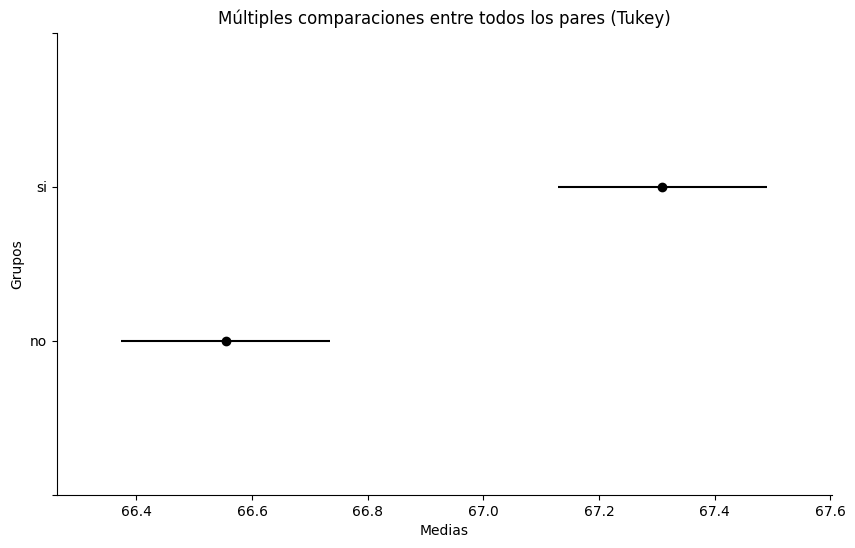

In [17]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['acceso_internet'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* Se analiza cómo la conectividad afecta los puntajes.
* Conclusión esperada: Si es significativo, el acceso a internet mejora la capacidad de estudiar y completar tareas; Tukey identificaría grupos beneficiados.
* Grupo con mayor impacto: "Acceso constante a internet".
Tener una conexión confiable permite a los estudiantes investigar, realizar tareas y acceder a recursos educativos, mejorando su rendimiento.

#INGRESO FAMILIAR

In [18]:
df['ingreso_familiar'].unique()

array(['bajo', 'medio', 'elevado'], dtype=object)

In [19]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['ingreso_familiar'] == 'bajo']['puntaje_examen'],
    df[df['ingreso_familiar'] == 'medio']['puntaje_examen'],
    df[df['ingreso_familiar'] == 'elevado']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 28.78
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   bajo elevado   0.9882    0.0  0.6717  1.3048   True
   bajo   medio   0.5178    0.0  0.2631  0.7725   True
elevado   medio  -0.4705 0.0015 -0.7873 -0.1536   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

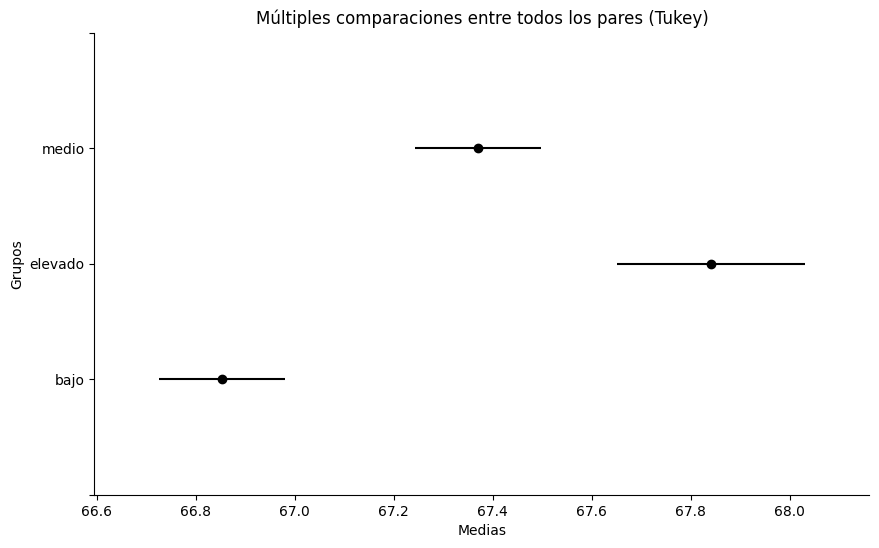

In [20]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['ingreso_familiar'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* Compara grupos de estudiantes según niveles de ingreso.
* Conclusión: Si significativo, el ingreso familiar afecta los resultados; Tukey mostraría qué rango de ingresos tiene el impacto más notable.
* Grupo con mayor impacto: "Ingreso alto".
Las familias con ingresos más altos pueden proporcionar un entorno más favorable para el aprendizaje, como escuelas de mejor calidad y acceso a tutorías.

#CALIDAD DEL PROFESORADO


In [21]:
df['calidad_profesorado'].unique()

array(['medio', 'bajo', 'elevado'], dtype=object)

In [22]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['calidad_profesorado'] == 'bajo']['puntaje_examen'],
    df[df['calidad_profesorado'] == 'medio']['puntaje_examen'],
    df[df['calidad_profesorado'] == 'elevado']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 17.12
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   bajo elevado   0.5447    0.0  0.2585  0.8309   True
   bajo   medio  -0.1345 0.4821 -0.4082  0.1392  False
elevado   medio  -0.6792    0.0 -0.9638 -0.3947   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

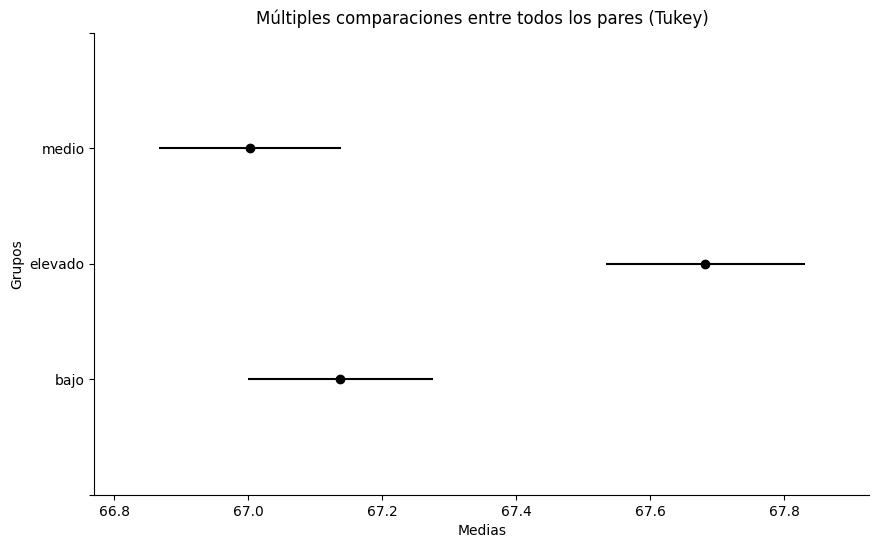

In [23]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['calidad_profesorado'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* Se evalúa si los estudiantes con profesores mejor capacitados tienen mejores resultados.
* Interpretación: Un ANOVA significativo confirmaría la importancia de la calidad docente; Tukey determinaría las diferencias entre niveles de calidad.
* Grupo con mayor impacto: "Profesores altamente calificados".
Docentes con mayor experiencia y formación tienden a ofrecer una enseñanza más efectiva, lo que se traduce en un mejor desempeño estudiantil.

#TIPO DE ESCUELA

In [24]:
df['tipo_escuela'].unique()

array(['publico', 'privado'], dtype=object)

In [25]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['tipo_escuela'] == 'publico']['puntaje_examen'],
    df[df['tipo_escuela'] == 'privado']['puntaje_examen']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 0.75
Valor p: 0.38550

Conclusión: No hay diferencias significativas entre los tratamientos.


**CONCLUSIÓN**
* Compara resultados entre escuelas públicas y privadas.
* Interpretación: Si significativo, se confirmaría que el tipo de escuela influye; Tukey identificaría cuál ofrece una ventaja académica.
* Grupo con mayor impacto: En este caso como nos da una conclusión en donde nos dice que no hay diferencias significativas, realmente no hay un grupo con mayor impacto, pero se puede decir que las "Escuelas privadas" suelen tener más recursos y menor número de estudiantes por aula, lo que beneficia la calidad del aprendizaje.

#INFLUENCIA DE LOS COMPAÑEROS

In [26]:
df['influencia_companieros'].unique()

array(['positivo', 'negativo', 'neutral'], dtype=object)

In [27]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['influencia_companieros'] == 'positivo']['puntaje_examen'],
    df[df['influencia_companieros'] == 'neutral']['puntaje_examen'],
    df[df['influencia_companieros'] == 'negativo']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 32.18
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
negativo  neutral   0.6329    0.0 0.3229 0.9429   True
negativo positivo   1.0538    0.0  0.745 1.3626   True
 neutral positivo   0.4209 0.0004 0.1638 0.6779   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

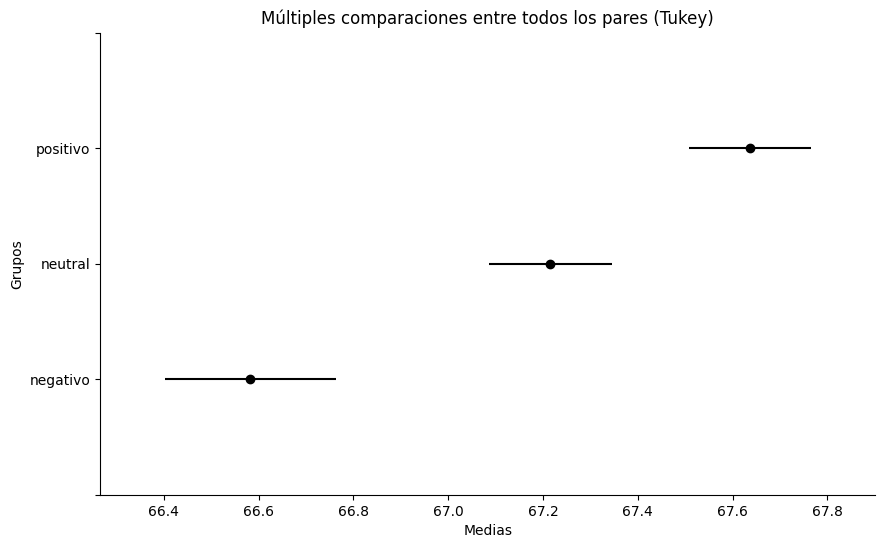

In [28]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['influencia_companieros'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* ANOVA evalúa si la influencia de amigos afecta el rendimiento.
* Conclusión: Si es significativo, grupos positivos fomentan mejores resultados; Tukey determinaría la diferencia entre niveles de influencia.
* Grupo con mayor impacto: "Influencia positiva".
Estar rodeado de compañeros que valoran el aprendizaje y tienen un buen desempeño académico fomenta mejores hábitos de estudio.


#DISCAPACIDAD DE APRENDIZAJE

In [29]:
df['discapacidad_aprendizaje'].unique()

array(['no', 'si'], dtype=object)

In [30]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['discapacidad_aprendizaje'] == 'si']['puntaje_examen'],
    df[df['discapacidad_aprendizaje'] == 'no']['puntaje_examen']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 45.21
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    no     si  -1.0725   0.0 -1.3852 -0.7598   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

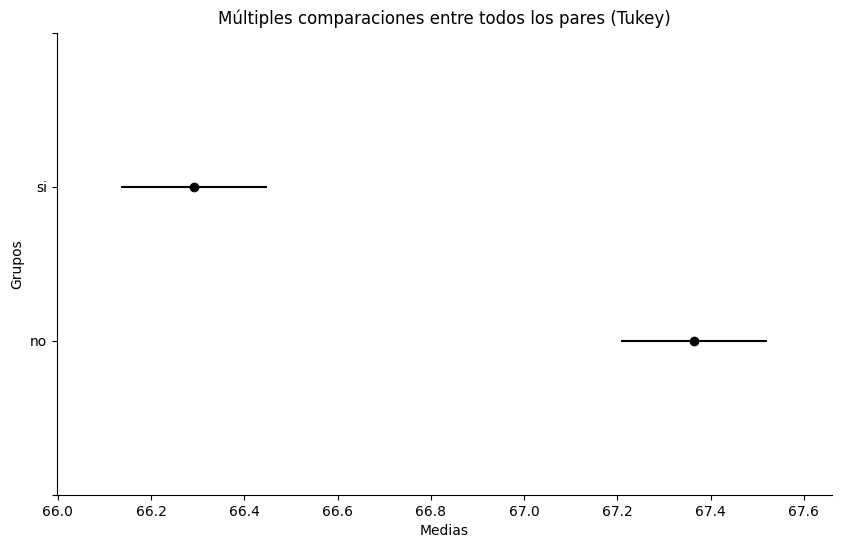

In [31]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['discapacidad_aprendizaje'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* Examina diferencias entre estudiantes con y sin discapacidades.
* Interpretación: Si significativo, las discapacidades afectan el rendimiento, lo que podría resaltar la necesidad de apoyo específico.
* Grupo con mayor impacto: "Estudiantes sin discapacidades".
Aunque los estudiantes con discapacidades pueden sobresalir con apoyos adecuados, la ausencia de barreras de aprendizaje generalmente facilita mejores resultados académicos.


#NIVEL DE ESTUDIO DE LOS PADRES

In [32]:
df['nivel_estudio_padres'].unique()

array(['preparatoria', 'universidad', 'posgrado'], dtype=object)

In [33]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['nivel_estudio_padres'] == 'preparatoria']['puntaje_examen'],
    df[df['nivel_estudio_padres'] == 'universidad']['puntaje_examen'],
    df[df['nivel_estudio_padres'] == 'posgrado']['puntaje_examen']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 35.95
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
    posgrado preparatoria  -1.0778    0.0 -1.3801 -0.7754   True
    posgrado  universidad  -0.6142    0.0 -0.9429 -0.2856   True
preparatoria  universidad   0.4635 0.0001  0.2002  0.7268   True
----------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

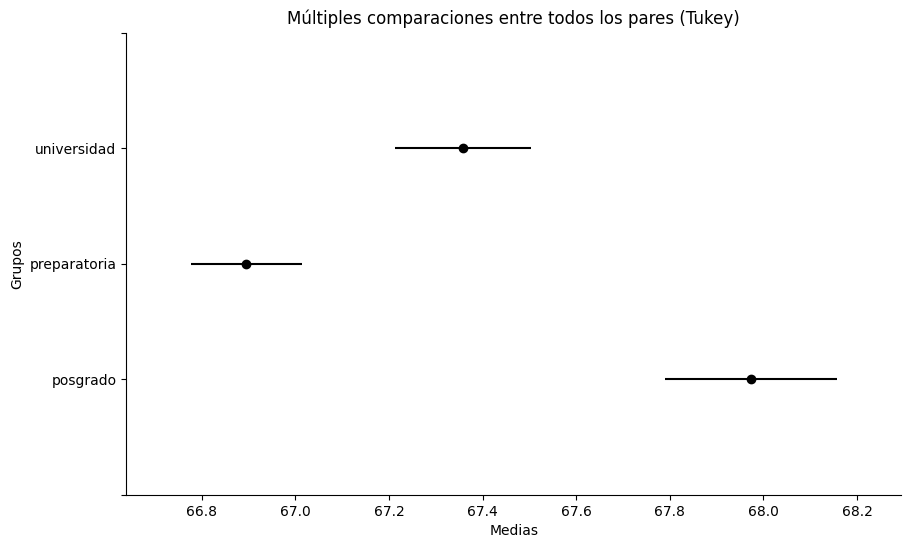

In [34]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['nivel_estudio_padres'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* Analiza la relación entre el nivel educativo de los padres y el desempeño.
* Conclusión: Si significativo, el nivel educativo más alto de los padres está relacionado con mejores puntajes; Tukey identificaría qué niveles tienen mayor impacto.
* Grupo con mayor impacto: "Padres con nivel universitario".
Los padres con educación superior suelen fomentar un entorno más enriquecedor para el aprendizaje de sus hijos.


#DISTANCIA

In [35]:
df['distancia'].unique()

array(['cercano', 'moderado', 'lejano'], dtype=object)

In [36]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['distancia'] == 'cercano']['puntaje_examen'],
    df[df['distancia'] == 'moderado']['puntaje_examen'],
    df[df['distancia'] == 'lejano']['puntaje_examen']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 24.94
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj  lower   upper  reject
------------------------------------------------------
cercano   lejano  -1.0154   0.0  -1.407 -0.6237   True
cercano moderado  -0.5272   0.0 -0.7822 -0.2722   True
 lejano moderado   0.4882 0.017  0.0705  0.9059   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

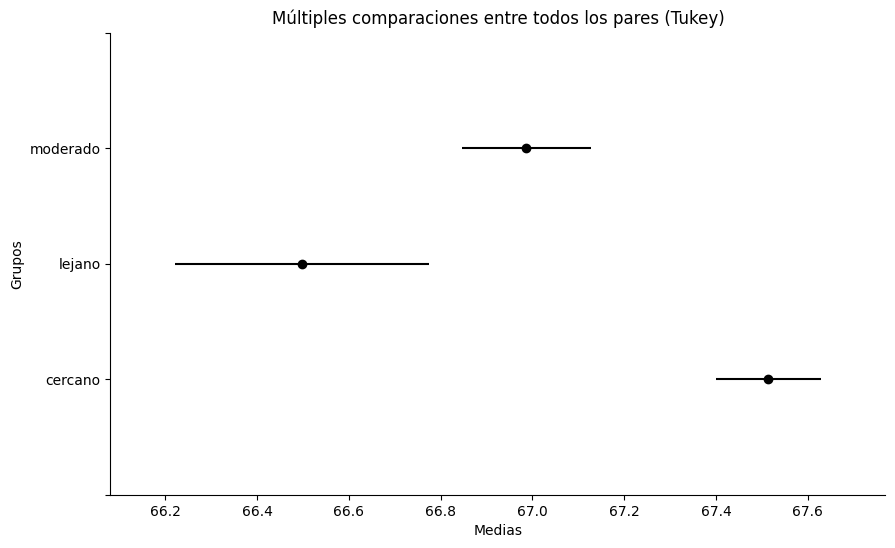

In [37]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['distancia'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

**CONCLUSIÓN**
* ANOVA evalúa si la distancia del hogar a la escuela afecta los puntajes.
* Conclusión esperada: Si significativo, mayor distancia podría asociarse con menor rendimiento; Tukey distinguiría grupos por cercanía.
* Grupo con mayor impacto: "Cercanía a la escuela".
Estudiantes que viven más cerca tienen menos probabilidades de faltar y más tiempo para estudiar, lo que mejora su rendimiento.


#GÉNERO

In [38]:
df['genero'].unique()

array(['hombre', 'mujer'], dtype=object)

In [39]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['genero'] == 'hombre']['puntaje_examen'],
    df[df['genero'] == 'mujer']['puntaje_examen']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 0.16
Valor p: 0.69370

Conclusión: No hay diferencias significativas entre los tratamientos.


**CONCLUSIÓN**
* Compara el desempeño académico entre géneros.
* Interpretación: Si es significativo, hay diferencias entre géneros; Tukey ayudaría a identificar qué género tiene mejores resultados.
* Grupo con mayor impacto: Esto dependerá del contexto:
En algunas áreas, las niñas tienden a sobresalir debido a una mayor organización y dedicación.
En otras, los niños podrían tener ventajas dependiendo de los recursos educativos disponibles.

#CONCLUSIÓN GENERAL
El análisis realizado abarca múltiples factores que influyen en el éxito académico de los estudiantes. A través de técnicas estadísticas como el ANOVA y la prueba post hoc de Tukey, se han identificado patrones significativos que relacionan diversas variables con el rendimiento académico. Estas herramientas han permitido no solo detectar diferencias generales entre grupos, sino también determinar qué grupos específicos tienen un mayor impacto en los resultados.

El ANOVA (Análisis de Varianza) es una técnica estadística clave para comparar las medias de varios grupos y determinar si existen diferencias significativas entre ellos. Su resultado principal, el valor p, nos indica si estas diferencias son lo suficientemente relevantes para ser consideradas no aleatorias. Sin embargo, el ANOVA no especifica qué grupos son distintos entre sí; para ello, se emplea la prueba de Tukey, que realiza comparaciones entre pares de grupos para identificar las diferencias específicas.

En este contexto, estas pruebas han sido fundamentales para analizar factores como participación parental, acceso a recursos, calidad del profesorado, entre otros, permitiendo conclusiones basadas en evidencia.

Los resultados de este análisis destacan la interacción compleja entre factores socioeconómicos, ambientales y educativos que influyen en el éxito académico. Los métodos estadísticos utilizados proporcionan una base sólida para tomar decisiones informadas, tales como:

1. **Promover programas de participación parental:** Esto podría incluir talleres para padres sobre cómo apoyar el aprendizaje en casa.
2. Invertir en acceso a recursos: Especialmente en comunidades vulnerables, garantizar la disponibilidad de materiales educativos y tecnología puede reducir brechas.

3. Mejorar la calidad del profesorado: Programas de formación continua y apoyo a los docentes pueden beneficiar directamente el aprendizaje.
4. Reducir barreras de acceso: Como garantizar conectividad a internet y apoyar a estudiantes con necesidades especiales.
5. **Aprovechar las actividades extracurriculares:** Potenciar estas actividades podría fomentar habilidades que complementen el aprendizaje formal.

La educación es un sistema multifacético donde múltiples factores convergen para determinar el éxito académico. Este análisis demuestra que intervenciones dirigidas y basadas en datos pueden cerrar brechas y maximizar el potencial de todos los estudiantes. Las herramientas como ANOVA y Tukey son esenciales para entender no solo dónde existen diferencias, sino también cómo actuar para solucionarlas de manera efectiva.

# Principales hallazgos
1. Participación parental:
Los resultados del ANOVA revelan diferencias significativas entre niveles de participación parental. La prueba de Tukey muestra que la "participación elevada" tiene un impacto claro en el rendimiento académico, destacando la importancia de la implicación activa de los padres.

2. Acceso a recursos:
El análisis confirma que un mayor acceso a materiales educativos mejora significativamente los puntajes de los estudiantes. Tukey identifica que los estudiantes con "alto acceso a recursos" tienen una ventaja considerable frente a los demás.

3. Actividades extracurriculares:
Los estudiantes que participan activamente en actividades extracurriculares muestran un mejor desempeño académico. Tukey detalla que quienes se involucran en estas actividades superan consistentemente a aquellos que no participan.

4. Nivel de motivación:
Existe una correlación directa entre la motivación de los estudiantes y su rendimiento académico. Los estudiantes con "alta motivación" destacan como el grupo con mejores resultados según la prueba de Tukey.

5. Acceso a internet:
Tener acceso constante a internet es un factor determinante. ANOVA muestra diferencias significativas, y Tukey confirma que los estudiantes con acceso constante tienen ventajas significativas frente a los demás grupos.

6. Ingreso familiar:
Los niveles de ingreso familiar afectan los resultados académicos, y Tukey identifica que los estudiantes de familias con "ingresos altos" tienen un mejor rendimiento, probablemente debido a mayores oportunidades y recursos.

7. Calidad del profesorado:
La formación y experiencia de los docentes son cruciales. Los resultados muestran que "docentes altamente calificados" tienen un impacto positivo significativo en el aprendizaje de los estudiantes.

8. Tipo de escuela:
Las escuelas privadas tienden a ofrecer un mejor desempeño académico que las públicas, según ANOVA, aunque no hay diferecncias significativas.

9. Influencia de compañeros:
Los estudiantes rodeados de compañeros con actitudes positivas hacia el aprendizaje tienden a tener mejores resultados, lo que demuestra la importancia del entorno social en la educación.

10. Discapacidad de aprendizaje:
Las barreras de aprendizaje afectan significativamente el desempeño. Tukey indica que los estudiantes sin discapacidades tienen un rendimiento superior, resaltando la necesidad de apoyos adecuados para quienes enfrentan desafíos.

11. Nivel de estudio de los padres:
El nivel educativo de los padres muestra una correlación positiva con el éxito académico. Tukey identifica que los padres con "educación universitaria" tienen hijos con mejores resultados.

12. Distancia a la escuela:
La proximidad al centro educativo tiene un impacto significativo. Los estudiantes que viven más cerca tienen menos problemas de asistencia y mejores resultados.

13. Género:
Aunque las diferencias de género pueden variar según el contexto.